# Assignment 3
Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the 
next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000
sample points with 14 distinct features such as Customer Id, Credit Score, Geography, Gender, Age, Tenure, Balance, etc.

Perform following steps: 1. Read the dataset. 2. Distinguish the feature and target set and divide the data set into 
training and test sets. 3. Normalize the train and test data. 4. Initialize and build the model. Identify the points of
improvement and implement the same. 5. Print the accuracy score and confusion matrix (5 points).

Write  theory of neural network based classifier for bank customer churn

submit file with file name as : rollno_assignment3

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print(df['Surname'].value_counts())

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64


In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df, columns = ['Geography', 'Gender'],drop_first=True) 

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


<AxesSubplot: xlabel='Exited', ylabel='count'>

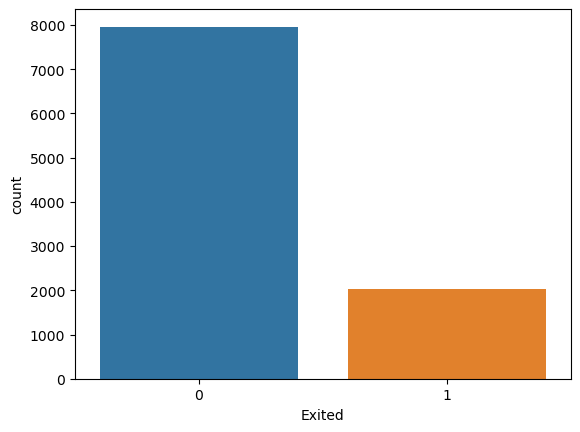

In [12]:
sns.countplot(x = df['Exited'])

In [13]:
df_encoded = pd.DataFrame(df_encoded, columns =['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited','Geography_Germany','Geography_Spain','Gender_Male'])

In [13]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
y = df_encoded['Exited']
X = df_encoded.drop(columns=['Exited'])

In [15]:
X.shape

(10000, 11)

In [16]:
scaler = StandardScaler()
X_encoded =scaler.fit_transform(X)
# df_encoded = df

In [23]:
X_encoded = pd.DataFrame(X_encoded,columns=X.columns)
X_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.578736,-0.573809,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.578736,-0.573809,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.578736,-0.573809,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.727904,-0.573809,0.912419


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=50)

In [25]:
X_train.shape

(8000, 11)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Initialize ANN
classifier = Sequential()

#Add input layer and hidden layer
classifier.add(Dense(9, activation = 'relu', input_shape = (11, )))
classifier.add(Dropout(rate = 0.1))
#Add second layer
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
#Add output layer
classifier.add(Dense(1, activation = 'sigmoid'))
#Let us take a look at our network
classifier.summary()
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 108       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.fit?

In [28]:
classifier.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.1, verbose = 2)

Epoch 1/200
225/225 - 1s - loss: 0.5580 - accuracy: 0.7918 - val_loss: 0.5150 - val_accuracy: 0.7825 - 1s/epoch - 5ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4842 - accuracy: 0.7981 - val_loss: 0.4673 - val_accuracy: 0.7837 - 243ms/epoch - 1ms/step
Epoch 3/200
225/225 - 0s - loss: 0.4504 - accuracy: 0.8062 - val_loss: 0.4456 - val_accuracy: 0.8150 - 237ms/epoch - 1ms/step
Epoch 4/200
225/225 - 0s - loss: 0.4377 - accuracy: 0.8140 - val_loss: 0.4369 - val_accuracy: 0.8250 - 226ms/epoch - 1ms/step
Epoch 5/200
225/225 - 0s - loss: 0.4245 - accuracy: 0.8163 - val_loss: 0.4329 - val_accuracy: 0.8288 - 272ms/epoch - 1ms/step
Epoch 6/200
225/225 - 0s - loss: 0.4208 - accuracy: 0.8224 - val_loss: 0.4271 - val_accuracy: 0.8375 - 316ms/epoch - 1ms/step
Epoch 7/200
225/225 - 0s - loss: 0.4212 - accuracy: 0.8204 - val_loss: 0.4245 - val_accuracy: 0.8375 - 277ms/epoch - 1ms/step
Epoch 8/200
225/225 - 0s - loss: 0.4161 - accuracy: 0.8229 - val_loss: 0.4227 - val_accuracy: 0.8375 - 288ms/epoch - 1ms/

Epoch 66/200
225/225 - 0s - loss: 0.3429 - accuracy: 0.8561 - val_loss: 0.3522 - val_accuracy: 0.8650 - 323ms/epoch - 1ms/step
Epoch 67/200
225/225 - 0s - loss: 0.3428 - accuracy: 0.8594 - val_loss: 0.3508 - val_accuracy: 0.8662 - 298ms/epoch - 1ms/step
Epoch 68/200
225/225 - 0s - loss: 0.3430 - accuracy: 0.8586 - val_loss: 0.3509 - val_accuracy: 0.8637 - 299ms/epoch - 1ms/step
Epoch 69/200
225/225 - 0s - loss: 0.3428 - accuracy: 0.8596 - val_loss: 0.3516 - val_accuracy: 0.8662 - 293ms/epoch - 1ms/step
Epoch 70/200
225/225 - 0s - loss: 0.3441 - accuracy: 0.8571 - val_loss: 0.3512 - val_accuracy: 0.8662 - 314ms/epoch - 1ms/step
Epoch 71/200
225/225 - 0s - loss: 0.3385 - accuracy: 0.8599 - val_loss: 0.3518 - val_accuracy: 0.8637 - 370ms/epoch - 2ms/step
Epoch 72/200
225/225 - 0s - loss: 0.3370 - accuracy: 0.8618 - val_loss: 0.3510 - val_accuracy: 0.8637 - 321ms/epoch - 1ms/step
Epoch 73/200
225/225 - 0s - loss: 0.3382 - accuracy: 0.8625 - val_loss: 0.3503 - val_accuracy: 0.8637 - 339ms/e

Epoch 131/200
225/225 - 0s - loss: 0.3316 - accuracy: 0.8636 - val_loss: 0.3452 - val_accuracy: 0.8687 - 262ms/epoch - 1ms/step
Epoch 132/200
225/225 - 0s - loss: 0.3334 - accuracy: 0.8626 - val_loss: 0.3453 - val_accuracy: 0.8662 - 271ms/epoch - 1ms/step
Epoch 133/200
225/225 - 0s - loss: 0.3368 - accuracy: 0.8635 - val_loss: 0.3460 - val_accuracy: 0.8662 - 224ms/epoch - 997us/step
Epoch 134/200
225/225 - 0s - loss: 0.3372 - accuracy: 0.8633 - val_loss: 0.3455 - val_accuracy: 0.8650 - 239ms/epoch - 1ms/step
Epoch 135/200
225/225 - 1s - loss: 0.3382 - accuracy: 0.8592 - val_loss: 0.3459 - val_accuracy: 0.8687 - 598ms/epoch - 3ms/step
Epoch 136/200
225/225 - 0s - loss: 0.3355 - accuracy: 0.8636 - val_loss: 0.3452 - val_accuracy: 0.8675 - 241ms/epoch - 1ms/step
Epoch 137/200
225/225 - 0s - loss: 0.3349 - accuracy: 0.8600 - val_loss: 0.3452 - val_accuracy: 0.8650 - 479ms/epoch - 2ms/step
Epoch 138/200
225/225 - 0s - loss: 0.3347 - accuracy: 0.8642 - val_loss: 0.3445 - val_accuracy: 0.8650

Epoch 195/200
225/225 - 0s - loss: 0.3373 - accuracy: 0.8628 - val_loss: 0.3442 - val_accuracy: 0.8625 - 243ms/epoch - 1ms/step
Epoch 196/200
225/225 - 0s - loss: 0.3358 - accuracy: 0.8635 - val_loss: 0.3450 - val_accuracy: 0.8662 - 238ms/epoch - 1ms/step
Epoch 197/200
225/225 - 0s - loss: 0.3410 - accuracy: 0.8594 - val_loss: 0.3459 - val_accuracy: 0.8637 - 234ms/epoch - 1ms/step
Epoch 198/200
225/225 - 0s - loss: 0.3353 - accuracy: 0.8626 - val_loss: 0.3451 - val_accuracy: 0.8625 - 223ms/epoch - 993us/step
Epoch 199/200
225/225 - 0s - loss: 0.3395 - accuracy: 0.8614 - val_loss: 0.3454 - val_accuracy: 0.8625 - 237ms/epoch - 1ms/step
Epoch 200/200
225/225 - 0s - loss: 0.3373 - accuracy: 0.8615 - val_loss: 0.3443 - val_accuracy: 0.8662 - 223ms/epoch - 993us/step


In [22]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


63/63 [==============================] - 0s 693us/step


In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1598    0]
 [ 402    0]]


In [25]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')
print((cm[0][0]+cm[1][1])*100/len(y_test),"accuracy is following")

79.9 % of data was classified correctly
79.9 accuracy is following
